In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import Perceptron
import pickle
import xgboost as xgb

##### Creating the dataset from the csv file for model implementation

In [122]:
df = pd.read_csv('image_features.csv')

In [123]:
print(df.head())
# print(df.columns)

         image         label         0         1         2         3  \
0  Image_1.jpg       sitting   90316.0  100405.0  102866.0  101792.0   
1  Image_2.jpg  using_laptop   27590.0   28243.0   29716.0   31651.0   
2  Image_3.jpg       hugging   41103.0   44295.0   45675.0   46283.0   
3  Image_4.jpg      sleeping   51811.0   50335.0   48994.0   51602.0   
4  Image_5.jpg  using_laptop  103939.0  111915.0  106367.0  110161.0   

          4         5         6         7  ...        40          41  \
0   96516.0   98304.0   96950.0   75810.0  ...  0.225891  130.728963   
1   29811.0   28081.0   26216.0   28266.0  ...  0.275085  109.515815   
2   47759.0   45378.0   45144.0   42223.0  ...  0.235718  105.140167   
3   50489.0   50175.0   56211.0   50671.0  ...  0.160645  113.777331   
4  107363.0  104932.0  106317.0  103129.0  ...  0.146301  136.100860   

           42          43          44          45          46          47  \
0  132.117393  133.384722  133.184732  130.621652  128.98

In [124]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()

labels = df['label'] 
image_names = df['image']  

['image', 'label', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']


In [125]:
print("Before dropping:")
print(df.head())  
print("Columns:", df.columns.tolist())

features = df.drop(['image', 'label'], axis=1, errors='ignore')

print("After dropping:")
print(features.head()) 
print("Columns:", features.columns.tolist())


Before dropping:
         image         label         0         1         2         3  \
0  Image_1.jpg       sitting   90316.0  100405.0  102866.0  101792.0   
1  Image_2.jpg  using_laptop   27590.0   28243.0   29716.0   31651.0   
2  Image_3.jpg       hugging   41103.0   44295.0   45675.0   46283.0   
3  Image_4.jpg      sleeping   51811.0   50335.0   48994.0   51602.0   
4  Image_5.jpg  using_laptop  103939.0  111915.0  106367.0  110161.0   

          4         5         6         7  ...        40          41  \
0   96516.0   98304.0   96950.0   75810.0  ...  0.225891  130.728963   
1   29811.0   28081.0   26216.0   28266.0  ...  0.275085  109.515815   
2   47759.0   45378.0   45144.0   42223.0  ...  0.235718  105.140167   
3   50489.0   50175.0   56211.0   50671.0  ...  0.160645  113.777331   
4  107363.0  104932.0  106317.0  103129.0  ...  0.146301  136.100860   

           42          43          44          45          46          47  \
0  132.117393  133.384722  133.184732  1

In [126]:
features = features.fillna(features.mean())

labels = df['label']
image_names = df['image']

print("Features DataFrame:")
print(features.head())
print("Labels:")
print(labels)

labels = labels.astype('category')

# check for missing values
print("Missing values in features:", features.isnull().sum())
print("Missing labels:", labels.isnull().sum())

Features DataFrame:
          0         1         2         3         4         5         6  \
0   90316.0  100405.0  102866.0  101792.0   96516.0   98304.0   96950.0   
1   27590.0   28243.0   29716.0   31651.0   29811.0   28081.0   26216.0   
2   41103.0   44295.0   45675.0   46283.0   47759.0   45378.0   45144.0   
3   51811.0   50335.0   48994.0   51602.0   50489.0   50175.0   56211.0   
4  103939.0  111915.0  106367.0  110161.0  107363.0  104932.0  106317.0   

          7         8         9  ...        40          41          42  \
0   75810.0  0.180481  0.144348  ...  0.225891  130.728963  132.117393   
1   28266.0  0.002014  0.013062  ...  0.275085  109.515815  120.993655   
2   42223.0  0.061157  0.096558  ...  0.235718  105.140167  108.586859   
3   50671.0  0.047546  0.174988  ...  0.160645  113.777331  110.377107   
4  103129.0  0.048950  0.117493  ...  0.146301  136.100860  135.827105   

           43          44          45          46          47          48  \
0  133.

In [127]:
X = features.values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

##### UMAP for better visualization of the data and its extracted features

C:\Users\Ritika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


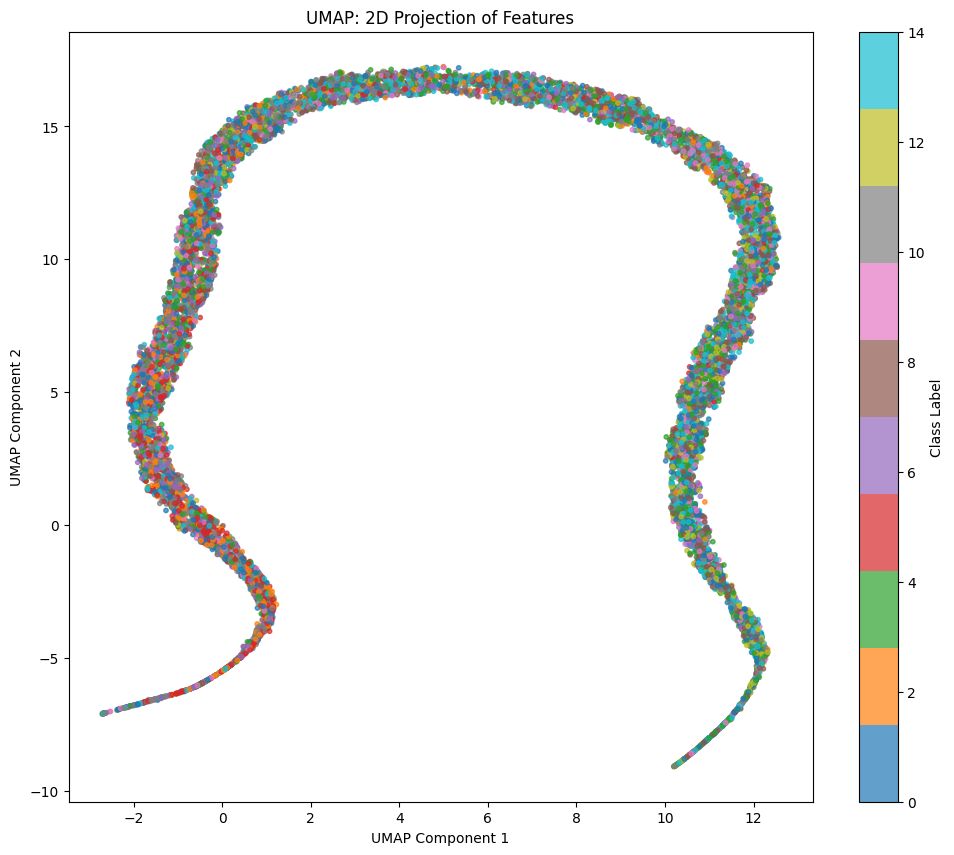

In [128]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_encoded, cmap='tab10', alpha=0.7, s=10)
plt.title('UMAP: 2D Projection of Features')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Class Label')
plt.show()

We can notice that our dataset is not linearly separable from the above UMAP.

##### Splitting the dataset into training and testing sets 80:20

In [129]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [130]:
X_train.shape

(10080, 50)

In [131]:
X_test.shape

(2520, 50)

In [132]:
y_train.shape

(10080,)

In [133]:
y_test.shape

(2520,)

## (3) Model Selection and Implementation

### XGBoost Classifier
XG Boost is a powerful and efficient implementation of the gradient boosting algorithm. It is an ensemble learning method that is used for classification and regression problems. It is based on the decision tree algorithm and is used to increase the accuracy of the model. It is known for its speed and performance. Theoretically, XGB should be able to perform just as well as a Random Forest, but with a lot less computational power. It is also known for its regularization techniques which help in reducing overfitting.

In [142]:
xg_model = xgb.XGBClassifier(n_estimators = 300, random_state = 42) # 275, 7
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)

In [143]:
xg_train_acc = accuracy_score(y_train, xg_model.predict(X_train))
print(f"Training Accuracy: {xg_train_acc* 100:.2f}%")
xg_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {xg_accuracy* 100:.2f}%")
print(classification_report(y_test, y_pred))

Training Accuracy: 100.00%
Testing Accuracy: 31.35%
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       173
           1       0.29      0.28      0.28       160
           2       0.47      0.43      0.45       186
           3       0.48      0.44      0.46       180
           4       0.21      0.19      0.20       152
           5       0.43      0.61      0.50       151
           6       0.46      0.44      0.45       186
           7       0.20      0.22      0.21       151
           8       0.33      0.30      0.31       179
           9       0.20      0.16      0.18       176
          10       0.29      0.33      0.31       155
          11       0.19      0.17      0.18       163
          12       0.36      0.40      0.38       162
          13       0.22      0.19      0.20       183
          14       0.28      0.33      0.30       163

    accuracy                           0.31      2520
   macro avg       0.31     

In [144]:
# saving the model
filename = 'xgb_model.sav'
pickle.dump(xg_model, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.3134920634920635


### Random Forest
Theoretically, random forest would be the best model to implement for this dataset as it is a non-linear dataset and random forest is a non-linear model. Random forest is an ensemble model that uses multiple decision trees to predict the output. It is a robust model that can handle large datasets with higher dimensionality. It is also less prone to overfitting as it uses multiple decision trees to predict the output.

In [14]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
rf_accuracy_train = rf_model.score(X_train, y_train)
print(f"Train Accuracy for Random Forest: {rf_accuracy_train * 100:.2f}%")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy for Random Forest: {rf_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))

Train Accuracy for Random Forest: 100.00%
Test Accuracy for Random Forest: 31.75%
              precision    recall  f1-score   support

           0       0.22      0.22      0.22       173
           1       0.31      0.26      0.28       160
           2       0.40      0.49      0.44       186
           3       0.48      0.44      0.46       180
           4       0.18      0.12      0.14       152
           5       0.34      0.61      0.43       151
           6       0.44      0.43      0.44       186
           7       0.21      0.20      0.20       151
           8       0.36      0.31      0.33       179
           9       0.25      0.16      0.20       176
          10       0.31      0.32      0.31       155
          11       0.20      0.17      0.19       163
          12       0.41      0.45      0.43       162
          13       0.24      0.20      0.22       183
          14       0.26      0.36      0.30       163

    accuracy                           0.32      252

In [16]:
# saving the model using pickle
filename = 'random_forest_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.31746031746031744


### Decision Tree

Decision tree is a simple non-linear model that can be used for classification and regression. It is a tree-like model where each node represents a feature and each branch represents a decision. It is a simple model that is easy to interpret and visualize. However, it is prone to overfitting and may not perform well on large datasets with higher dimensionality, like the one we have.

In [17]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=11)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [18]:
dt_accuracy_train = dt_model.score(X_train, y_train)
print(f"Train Accuracy for Decision Tree: {dt_accuracy_train * 100:.2f}%")
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy for Decision Tree: {dt_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_dt))

Train Accuracy for Decision Tree: 47.06%
Test Accuracy for Decision Tree: 20.32%
              precision    recall  f1-score   support

           0       0.12      0.17      0.14       173
           1       0.11      0.08      0.09       160
           2       0.38      0.36      0.37       186
           3       0.27      0.25      0.26       180
           4       0.13      0.12      0.13       152
           5       0.29      0.40      0.34       151
           6       0.31      0.23      0.27       186
           7       0.12      0.18      0.14       151
           8       0.23      0.13      0.17       179
           9       0.13      0.16      0.14       176
          10       0.17      0.14      0.15       155
          11       0.15      0.18      0.17       163
          12       0.29      0.25      0.27       162
          13       0.22      0.11      0.15       183
          14       0.20      0.27      0.23       163

    accuracy                           0.20      2520

In [19]:
# saving the model using pickle
filename = 'decision_tree_model.sav'
pickle.dump(dt_model, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.20317460317460317


#### Scaling and PCA to reduce the dimensionality of the data and apply naive bayes

Applying PCA keeping 95% of the variance to reduce the dimensionality of the data and then applying naive bayes to classify the data.

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

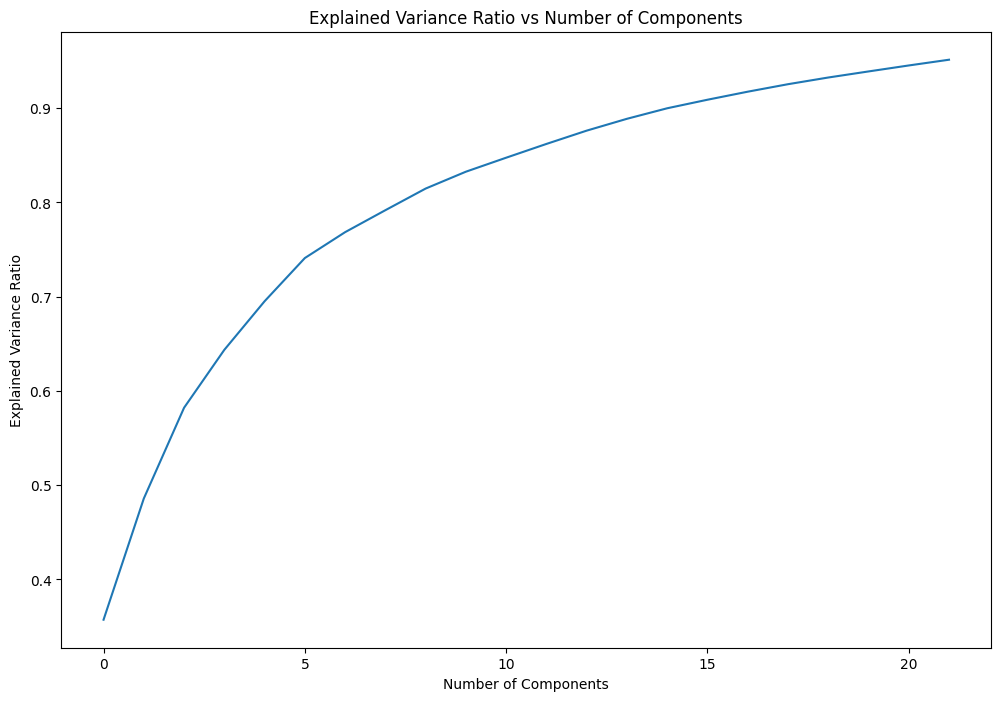

In [22]:
# plotting the explained variance ratio
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.show()

### Naive Bayes

Naive Bayes is a simple probabilistic model that is based on Bayes' theorem. It is a simple model that is easy to implement and interpret. It is a good model for text classification and spam filtering. However, it assumes that the features are independent, which may not be true in real-world datasets, and is not true for our model. It is a linear model that may not perform well on non-linear datasets, like the one we have.

In [23]:
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_test_pca)

In [24]:
nb_accuracy_train = nb_model.score(X_train_pca, y_train)
print(f"Train Accuracy for Gaussian Naive Bayes: {nb_accuracy_train * 100:.2f}%")
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Test Accuracy for Gaussian Naive Bayes: {nb_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))

Train Accuracy for Gaussian Naive Bayes: 22.88%
Test Accuracy for Gaussian Naive Bayes: 21.19%
              precision    recall  f1-score   support

           0       0.16      0.07      0.10       173
           1       0.21      0.10      0.14       160
           2       0.39      0.31      0.34       186
           3       0.22      0.33      0.27       180
           4       0.20      0.05      0.08       152
           5       0.17      0.80      0.28       151
           6       0.31      0.26      0.28       186
           7       0.10      0.07      0.08       151
           8       0.26      0.13      0.17       179
           9       0.14      0.07      0.09       176
          10       0.28      0.20      0.23       155
          11       0.17      0.13      0.14       163
          12       0.27      0.30      0.29       162
          13       0.18      0.09      0.12       183
          14       0.19      0.30      0.24       163

    accuracy                           

In [25]:
# saving the model using pickle
filename = 'gaussian_nb_model.sav'
pickle.dump(nb_model, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.2119047619047619


### Stacking the models

### Random Forest + Naive Bayes + Perceptron

Stacking is an ensemble learning technique that combines multiple models to improve the performance of the final model. It is a powerful technique that can be used to improve the performance of individual models. In this case, we are stacking random forest, naive bayes, and perceptron to improve the performance of the final model. Random forest is a non-linear model that can handle large datasets with higher dimensionality. Naive bayes is a simple probabilistic model that is easy to implement and interpret. Perceptron is a simple linear model that can be used for binary classification. By combining these models, we should be able to improve the performance of the final model, atleast in comparison to both Naive Bayes and Perceptron.

In [26]:
# stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('nb', GaussianNB()),
    ('perceptron', Perceptron(max_iter=800, tol=1e-3))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=500, random_state=42))
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

In [27]:
y_pred_accuracy_train = stack_model.score(X_train, y_train)
print(f"Train Accuracy for Stacking: {y_pred_accuracy_train * 100:.2f}%")
y_pred_accuracy = accuracy_score(y_test, y_pred_stack)
print(f"Test Accuracy for Stacking: {y_pred_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_stack))

Train Accuracy for Stacking: 79.09%
Test Accuracy for Stacking: 28.65%
              precision    recall  f1-score   support

           0       0.17      0.20      0.18       173
           1       0.27      0.24      0.26       160
           2       0.35      0.48      0.41       186
           3       0.45      0.47      0.46       180
           4       0.17      0.14      0.15       152
           5       0.37      0.56      0.45       151
           6       0.44      0.35      0.39       186
           7       0.17      0.23      0.20       151
           8       0.23      0.32      0.27       179
           9       0.20      0.09      0.12       176
          10       0.28      0.29      0.28       155
          11       0.16      0.11      0.13       163
          12       0.50      0.31      0.39       162
          13       0.26      0.16      0.20       183
          14       0.25      0.33      0.28       163

    accuracy                           0.29      2520
   macro 

In [28]:
# saving the model using pickle
filename = 'stacking_model.sav'
pickle.dump(stack_model, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.2865079365079365


### Naive Bayes + Random Forest

Stacking Random Forest on top of Naive Bayes should improve the performace of our model, atleast in comparison to Naive Bayes because the non-linearity of Random Forest should be able to capture the non-linear patterns in the data that Naive Bayes is not able to capture while Naive Bayes should be able to capture the linear patterns in the data that Random Forest is not able to capture, thus improving the overall performance of the model.

In [29]:
estimators2 = [
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
]

stack_model2 = StackingClassifier(estimators=estimators2, final_estimator=RandomForestClassifier(n_estimators=500, random_state=42))
stack_model2.fit(X_train, y_train)
y_pred_stack2 = stack_model2.predict(X_test)

In [30]:
y_pred_accuracy_train2 = stack_model2.score(X_train, y_train)
print(f"Train Accuracy for Stacking: {y_pred_accuracy_train2 * 100:.2f}%")
y_pred_accuracy2 = accuracy_score(y_test, y_pred_stack2)
print(f"Test Accuracy for Stacking: {y_pred_accuracy2 * 100:.2f}%")
print(classification_report(y_test, y_pred_stack2))

Train Accuracy for Stacking: 88.12%
Test Accuracy for Stacking: 28.61%
              precision    recall  f1-score   support

           0       0.20      0.20      0.20       173
           1       0.28      0.23      0.25       160
           2       0.36      0.44      0.40       186
           3       0.44      0.47      0.45       180
           4       0.15      0.13      0.14       152
           5       0.39      0.57      0.46       151
           6       0.43      0.38      0.40       186
           7       0.16      0.19      0.17       151
           8       0.24      0.27      0.25       179
           9       0.20      0.10      0.14       176
          10       0.26      0.29      0.27       155
          11       0.16      0.15      0.16       163
          12       0.43      0.31      0.36       162
          13       0.23      0.17      0.20       183
          14       0.27      0.36      0.31       163

    accuracy                           0.29      2520
   macro 

In [31]:
# saving the model using pickle
filename = 'stacking_model2.sav'
pickle.dump(stack_model2, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.2861111111111111


### Naive Bayes + Random Forest on PCA reduced data

Since Naive Bayes performs better on lower dimensional data, we can apply PCA to reduce the dimensionality of the data and then apply Naive Bayes and Random Forest on the reduced data to improve the performance of the model.

In [32]:
estimators3 = [
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
]

stack_model3 = StackingClassifier(estimators=estimators3, final_estimator=RandomForestClassifier(n_estimators=500, random_state=42))
stack_model3.fit(X_train_pca, y_train)
y_pred_stack3 = stack_model3.predict(X_test_pca)

In [33]:
y_pred_accuracy_train3 = stack_model3.score(X_train_pca, y_train)
print(f"Train Accuracy for Stacking: {y_pred_accuracy_train3 * 100:.2f}%")
y_pred_accuracy3 = accuracy_score(y_test, y_pred_stack3)
print(f"Test Accuracy for Stacking: {y_pred_accuracy3 * 100:.2f}%")
print(classification_report(y_test, y_pred_stack3))

Train Accuracy for Stacking: 84.74%
Test Accuracy for Stacking: 26.98%
              precision    recall  f1-score   support

           0       0.17      0.14      0.15       173
           1       0.27      0.24      0.26       160
           2       0.35      0.39      0.37       186
           3       0.38      0.42      0.39       180
           4       0.13      0.11      0.12       152
           5       0.34      0.58      0.43       151
           6       0.36      0.37      0.36       186
           7       0.14      0.15      0.14       151
           8       0.27      0.31      0.29       179
           9       0.16      0.09      0.11       176
          10       0.25      0.32      0.28       155
          11       0.19      0.13      0.15       163
          12       0.39      0.34      0.36       162
          13       0.25      0.16      0.20       183
          14       0.22      0.31      0.25       163

    accuracy                           0.27      2520
   macro 

In [34]:
# saving the model using pickle
filename = 'stacking_model3.sav'
pickle.dump(stack_model3, open(filename, 'wb'))

# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pca, y_test)
print(result)

0.2698412698412698


Hence, we notice that our best accuracy was obtained for Random Forest Classifier. However stacking Random Forest, Naive Bayes and Perceptron gave us a quite close and decent accuracy as well. Similarly, XGBoost also gave the second best accuracy. Other models like Decision Tree and Naive Bayes did not perform well on this dataset. and needed to be stacked with other models to improve the performance.